**Title of ML project: Term Deposit Prediction Model (Bank Marketing)**

**Name:** Aparna P

**Organization:** Entri Elevate

**Date:** 13-7-2025

1.**Overview of Problem Statement:**

The project focuses on developing a predictive model to determine whether a bank client will subscribe to a term deposit product based on historical telemarketing data. The data was collected from direct marketing campaigns (via phone calls) conducted by a Portuguese banking institution.

The bank aims to optimize marketing efforts by identifying which clients are more likely to subscribe, thereby reducing unnecessary contacts, saving costs, and improving campaign effectiveness.

The classification problem involves multiple customer-related features such as demographics, past interactions, and campaign outcomes, which are used to predict the binary outcome variable y — ‘yes’ (client subscribed) or ‘no’ (client did not subscribe).

2.**Objective:**
   
To build a classification model that predicts whether a client will subscribe to a term deposit based on data collected during telemarketing campaigns by a Portuguese bank.

3.**Data Description:**

#####   Source: UC irvene Machine Learning Repository:https://archive.ics.uci.edu/dataset/222/bank+marketing  
#####   Features:  16
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")  
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)  
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")  
   10 - day: last contact day of the month (numeric)  
   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
   12 - duration: last contact duration, in seconds (numeric)  
   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign  
    (numeric, -1 means client was not previously contacted)  
   15 - previous: number of contacts performed before this campaign and for this client (numeric)  
   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  
  Output variable (desired target):  
17 - y - has the client subscribed a term deposit? (binary: "yes","no")  


4.**Data Collection:**

In [18]:
import pandas as pd
df = pd.read_csv('anaconda3/classnotebook/bank-full.csv',sep=';')
print("Number of Rows (Instances):", df.shape[0])
print("Number of Columns (Features):", df.shape[1])

Number of Rows (Instances): 45211
Number of Columns (Features): 17


In [19]:
# Check the first few rows
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
print(df.info())
print(df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

In [21]:
# Shape of the dataset
df.shape

(45211, 17)

In [22]:
# Statistical summary for numeric features
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [23]:
target_counts = df['y'].value_counts()
target_counts

y
no     39922
yes     5289
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

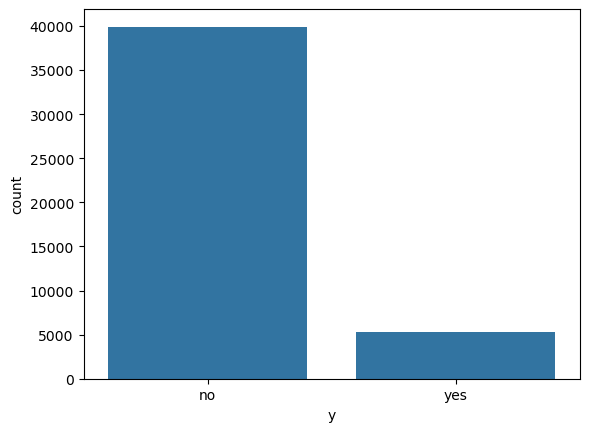

In [24]:
#visualize Relationship of target coloumn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df["y"])

Insight on Target Variable Distribution (Chart) This bar chart shows a significant class imbalance in target variable y: Majority Class (no): ~40,000 instances Minority Class (yes): ~5,000 instances

5. **Data Preprocessing - Data Cleaning:**

In [27]:
# Check for Outliers
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print(numeric_cols)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


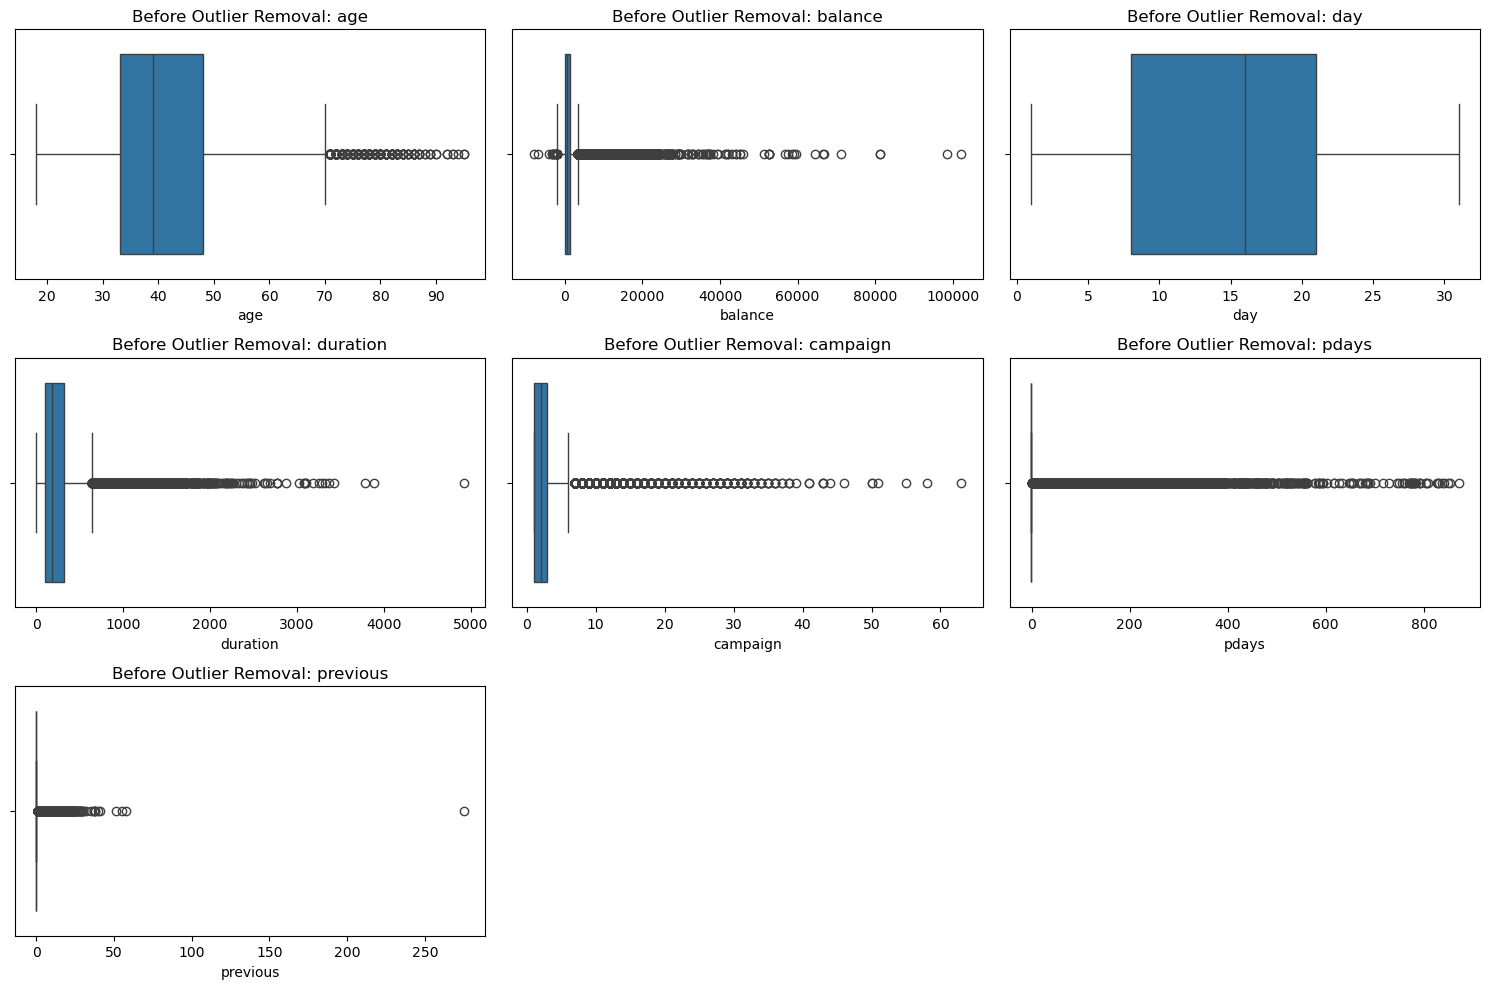

In [28]:
# Boxplot before removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Before Outlier Removal: {col}")
plt.tight_layout()
plt.show()

Insight: These plots help visually detect outliers in each numeric column. showing all the coloumns have significant outliers except Day coloumn.

In [30]:
#Outlier Detection And Removal : using IQR (Interquartile Range) to detect and remove outliers in numerical columns like age, balance, campaign.
# Function to remove outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]
    # Remove outliers from selected columns
for col in numeric_cols:
    df = remove_outliers(df, col)

age - Q1: 33.0, Q3: 48.0, IQR: 15.0
balance - Q1: 71.0, Q3: 1408.0, IQR: 1337.0
day - Q1: 8.0, Q3: 21.0, IQR: 13.0
duration - Q1: 102.0, Q3: 315.0, IQR: 213.0
campaign - Q1: 1.0, Q3: 3.0, IQR: 2.0
pdays - Q1: -1.0, Q3: -1.0, IQR: 0.0
previous - Q1: 0.0, Q3: 0.0, IQR: 0.0


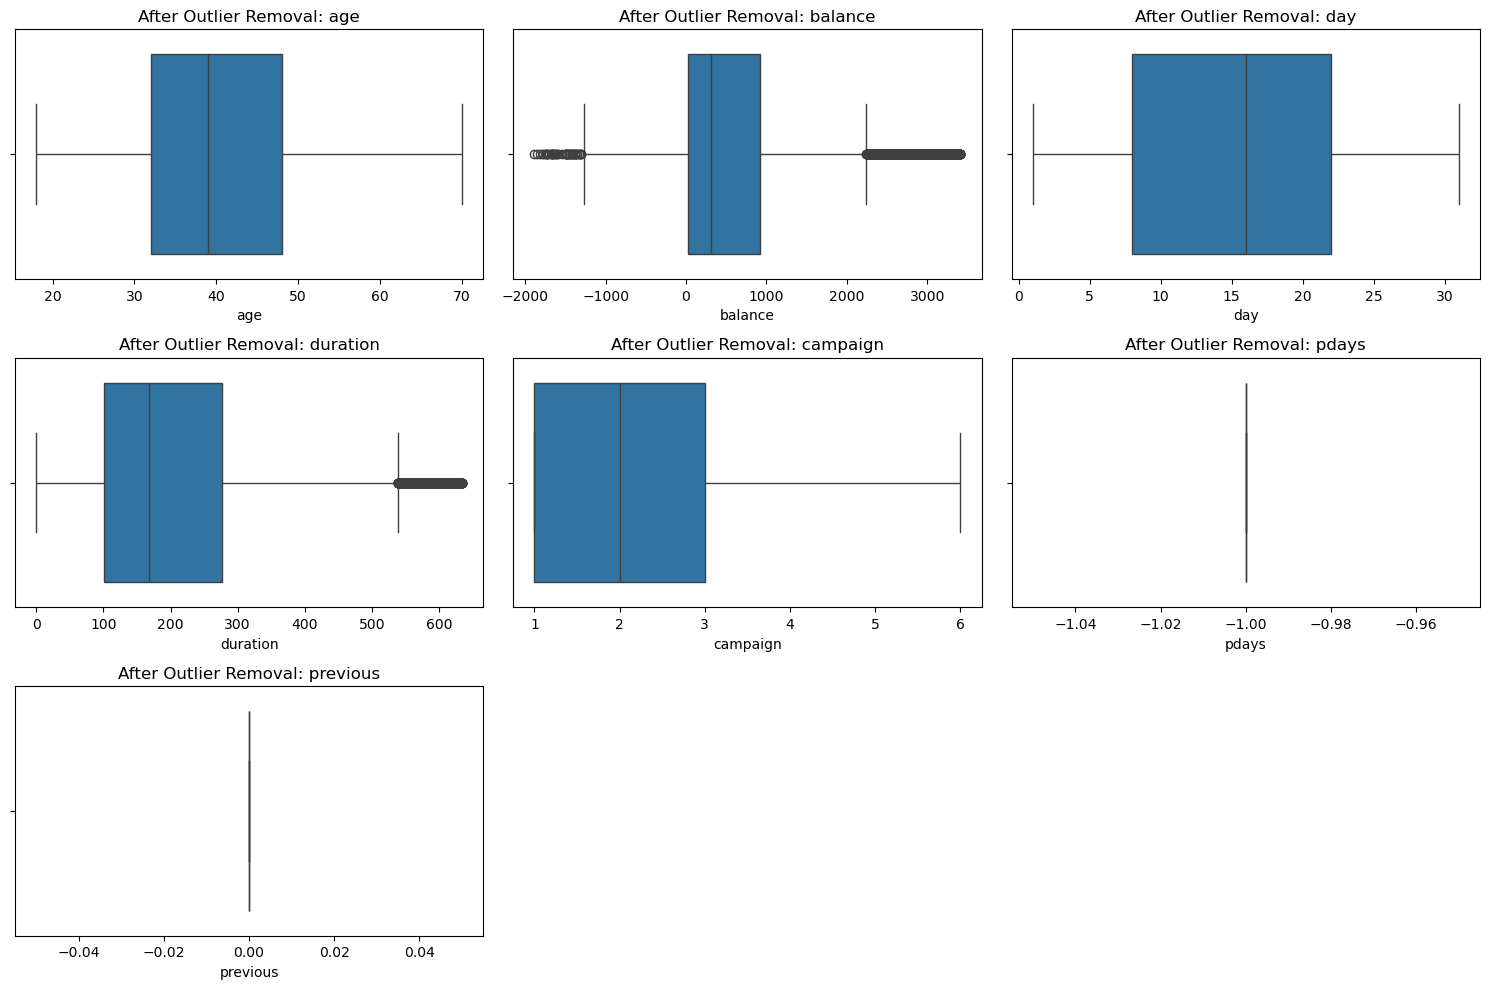

In [31]:
# Boxplot after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"After Outlier Removal: {col}")
plt.tight_layout()
plt.show()

Insight: After removing outliers, most columns show compact, cleaner distributions. most of the outliers in the duration column has cleared . 

In [33]:
print("\nData  After Outlier Removal:")
print(df.head())


Data  After Outlier Removal:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [34]:
# Check Skewness Before 
print("Skewness Before Handling:")
for col in numeric_cols:
    print(f"{col}: {df[col].skew():.4f}")

Skewness Before Handling:
age: 0.3850
balance: 1.3330
day: 0.1081
duration: 1.0199
campaign: 1.1536
pdays: 0.0000
previous: 0.0000


In [35]:
# Compute Z-scores
from scipy.stats import zscore

# Compute Z-scores for numerical columns
z_scores = df[numeric_cols].apply(zscore)
print(z_scores.head())



        age   balance       day  duration  campaign  pdays  previous
0  1.784515  1.868138 -1.288752  0.412766  -0.88708    NaN       NaN
1  0.367955 -0.695514 -1.288752 -0.386401  -0.88708    NaN       NaN
2 -0.745056 -0.728257 -1.288752 -0.931288  -0.88708    NaN       NaN
3  0.671504  1.095647 -1.288752 -0.815045  -0.88708    NaN       NaN
4 -0.745056 -0.729470 -1.288752 -0.044939  -0.88708    NaN       NaN


In [36]:
# Check Skewness After Handling
print("\nSkewness After Handling:")
for col in numeric_cols:
    print(f"{col}: {pd.Series(df[col]).skew():.4f}")


Skewness After Handling:
age: 0.3850
balance: 1.3330
day: 0.1081
duration: 1.0199
campaign: 1.1536
pdays: 0.0000
previous: 0.0000


In [37]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check for infinities in numeric data only
print("Has Inf:", np.isinf(numeric_df).values.any())
print("Inf counts:\n", np.isinf(numeric_df).sum())

Has Inf: False
Inf counts:
 age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64


In [38]:
# Replace inf/-inf with NaN across entire DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Then handle missing values as needed
df.dropna(inplace=True)  # or use fillna()

In [39]:
from sklearn.preprocessing import PowerTransformer
# skewness of balance,duration,campaign are high so applying yeojohnson 
pt = PowerTransformer(method='yeo-johnson')
df[['balance', 'duration', 'campaign']] = pt.fit_transform(df[['balance', 'duration', 'campaign']])
for col in ['balance', 'duration', 'campaign']:
    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness:.4f}")

Skewness of balance: 0.3523
Skewness of duration: -0.0194
Skewness of campaign: 0.1572


6. **Exploratory Data Analysis (EDA):**

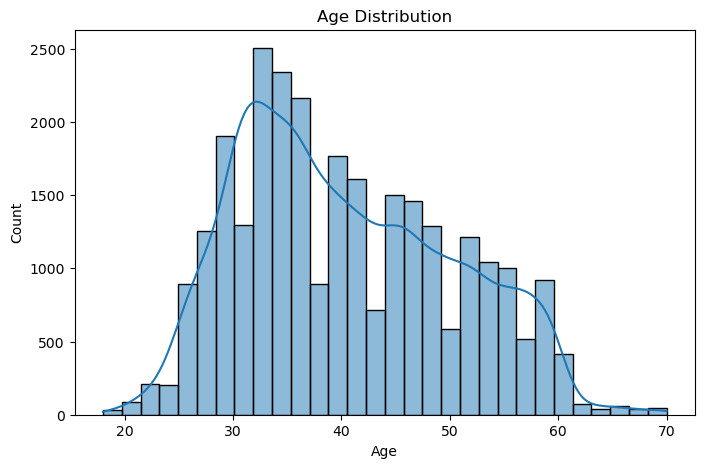

In [41]:
#1. Histogram – Data Distribution
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

This is a histogram with KDE showing the distribution of ages among the clients. Insight: Most clients are aged between 30 and 40 years. The distribution is slightly right-skewed, meaning a larger number of clients are younger, with fewer older clients. The distribution is continuous and smooth, which is good for numerical modeling.

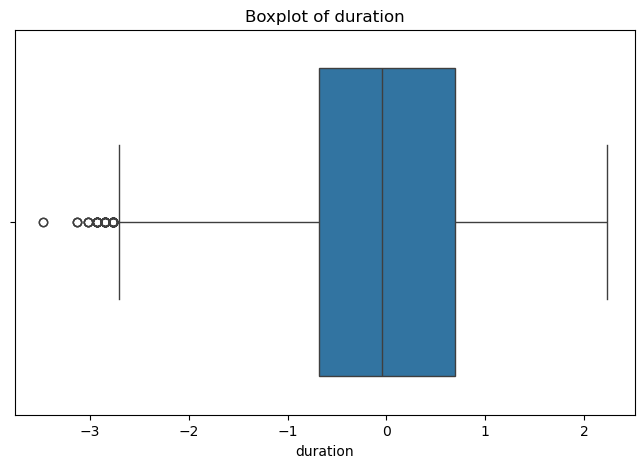

In [43]:
#2. Boxplot – Detecting Outliers
# Boxplot of duration
plt.figure(figsize=(8,5))
sns.boxplot(x=df['duration'])
plt.title('Boxplot of duration')
plt.show()

Insight: Boxplot of duration (After Transformation & Outlier Removal)
This boxplot shows the distribution of the day duration after:
Outlier removal using IQR method
Skewness handling via Yeo-Johnson transformation
Observations:
 The box is compact and symmetric, indicating the distribution is now normalized.
 There are some visible outliers.
 The median (central line) is almost centered, suggesting reduced skewness.

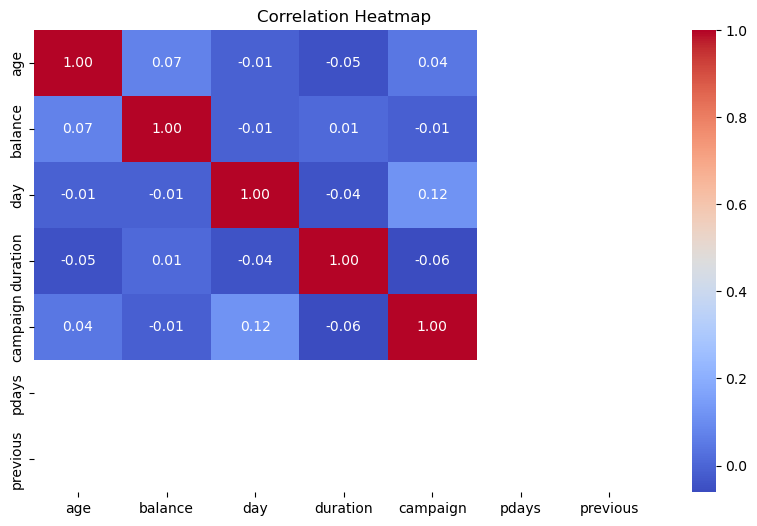

In [45]:
# 3. Heat map
# Select numeric columns
df_numeric = df.copy()
numeric_df = df_numeric.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Insight Very low correlation values between most features (all values are close to 0) No strong positive or negative correlations - No variable pair exceeds ±0.12, meaning multicollinearity is not a concern.

C:\Users\aparn\AppData\Local\Temp\ipykernel_1072\829094676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='pastel')


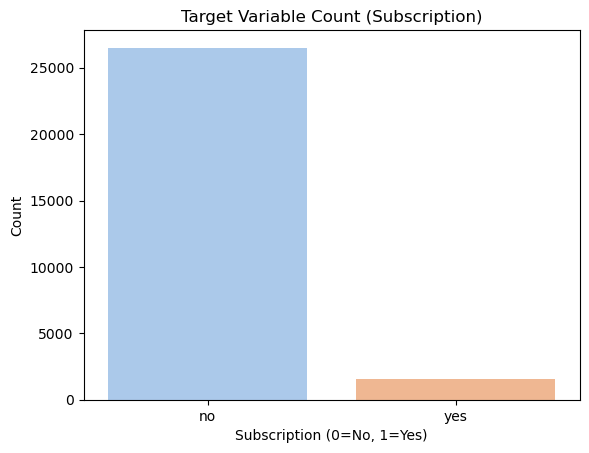

In [47]:
#4.Count Plot
sns.countplot(x='y', data=df, palette='pastel')
plt.title("Target Variable Count (Subscription)")
plt.xlabel("Subscription (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

Insight - Useful to detect class imbalance.Here one class dominates, consider SMOTE for sampling.


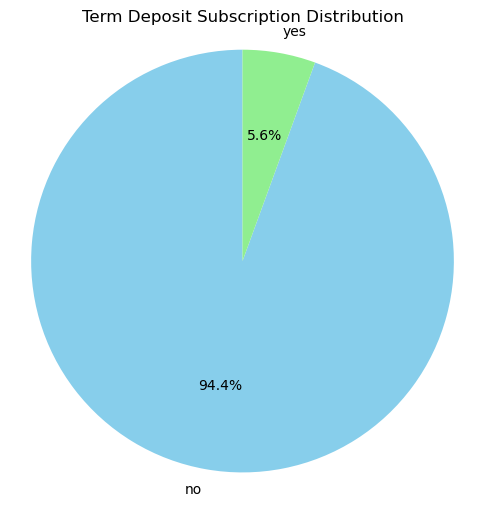

In [49]:
#5. Pie Chart – Target Class Distribution
# Pie chart for target variable
labels = df['y'].value_counts().index
sizes = df['y'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Term Deposit Subscription Distribution')
plt.axis('equal')
plt.show()

Insight: Term Deposit Subscription Distribution (Pie Chart)
This pie chart visualizes the class distribution of the target variable y, which indicates whether a customer subscribed to a term deposit.
Observation:
 "No" (did not subscribe): 94.4%
 "Yes" (subscribed): 5.6%

7. **Feature Engineering:**

In [52]:
#Identify Categorical Features
# List categorical columns (excluding target 'y' only if it's present)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove 'y' only if it exists
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print("Categorical Columns:", categorical_cols)

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [53]:
#Encoding Target Variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y']) # Encode target column (yes/no → 1/0)


In [54]:
# One-hot encode selected categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("Shape after encoding:", df.shape)
df.head()

Shape after encoding: (28069, 40)


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,1.722627,5,0.602092,-1.111407,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,-0.603013,5,-0.189052,-1.111407,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,-0.643364,5,-0.999343,-1.111407,-1,0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
3,47,1.063007,5,-0.792069,-1.111407,-1,0,0,True,False,...,False,False,False,False,False,False,True,False,False,False
4,33,-0.645067,5,0.184940,-1.111407,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False


8. **Feature Selection:**


In [56]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X = df.drop('y', axis=1)
y = df['y']
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top 10 selected features:", selected_features.tolist())


Top 10 selected features: ['age', 'balance', 'day', 'duration', 'marital_married', 'housing_yes', 'contact_unknown', 'month_mar', 'month_may', 'month_oct']


In [57]:
# These are your top features already selected
top_features = selected_features.tolist()

# Filter the dataset to keep only top features + target variable
df_selected = df[top_features + ['y']]

In [58]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # set a threshold for variance
X_high_variance = selector.fit_transform(X)

In [59]:
import numpy as np

corr_matrix = df[top_features].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_reduced = df.drop(columns=to_drop)
print("Dropped redundant features:", to_drop)

Dropped redundant features: []


9. **Split Data into Training and Testing Sets:**

In [61]:
# Count of each class
class_counts = df['y'].value_counts()
print("Class Distribution:\n", class_counts)

# Imbalance Ratio
majority = class_counts.max()
minority = class_counts.min()
imbalance_ratio = round(majority / minority, 2)

print(f"\nClass Imbalance Ratio (Majority:Minority) = {imbalance_ratio}:1")

Class Distribution:
 y
0    26504
1     1565
Name: count, dtype: int64

Class Imbalance Ratio (Majority:Minority) = 16.94:1


In [62]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Train-test split (typically 80/20 or 70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (22455, 39)
Testing set shape: (5614, 39)


A class imbalance ratio of 16.94:1 means your target variable (y) is highly imbalanced — for every 1 positive instance (minority class), there are nearly 17 negative ones (majority class). 
Why This Is a Problem:
If you train your models directly on this data:
The model will likely ignore the minority class.
Metrics like accuracy will be misleading.
Important metrics like recall, F1-score, and AUC will be very poor for the minority class.


What You Should Do Now: Apply SMOTE (Synthetic Minority Oversampling Technique)
Here’s how to apply SMOTE only to the training data:

In [65]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE after splitting
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("After SMOTE:", Counter(y_train_resampled))

After SMOTE: Counter({0: 21203, 1: 21203})


Only apply SMOTE on training data, not on test data — to avoid data leakage.

After SMOTE,  training set will be balanced, and  models will learn to identify both classes more accurately.

<Axes: xlabel='y', ylabel='count'>

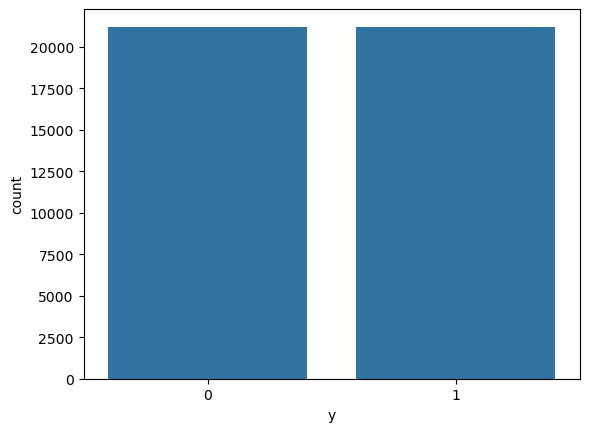

In [67]:
import seaborn as sns
sns.countplot(x=y_train_resampled)

10. **Feature Scaling:**


In [69]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns (excluding target 'y')
numeric_cols = df.select_dtypes(include='number').columns.drop('y')
numeric_cols = [col for col in numeric_cols if col in X_train_resampled.columns]

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_resampled[numeric_cols] = scaler.fit_transform(X_train_resampled[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


11. **Build the ML Model:**

In [71]:
# Logistic Regression after resampling (SMOTE)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)  # ✅ Train on resampled data
y_pred_lr = lr.predict(X_test)                # ✅ Test on original test set
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8929462059137869


In [72]:
#2. Support Vector Machine - SVM 
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.9303526897043106


In [73]:
# 3.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_resampled, y_train_resampled)
y_pred_rfc = rfc.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))


Random Forest Accuracy: 0.9403277520484503


In [74]:
# 4. K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.9004275026718916


In [75]:
# 5. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9002493765586035


In [76]:
print("\nFinal Dataset Shape:", df.shape)
df.head()


Final Dataset Shape: (28069, 40)


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,1.722627,5,0.602092,-1.111407,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,-0.603013,5,-0.189052,-1.111407,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,-0.643364,5,-0.999343,-1.111407,-1,0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
3,47,1.063007,5,-0.792069,-1.111407,-1,0,0,True,False,...,False,False,False,False,False,False,True,False,False,False
4,33,-0.645067,5,0.184940,-1.111407,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False


12. **Model Evaluation:**


----- Logistic Regression -----


<Figure size 1000x700 with 0 Axes>

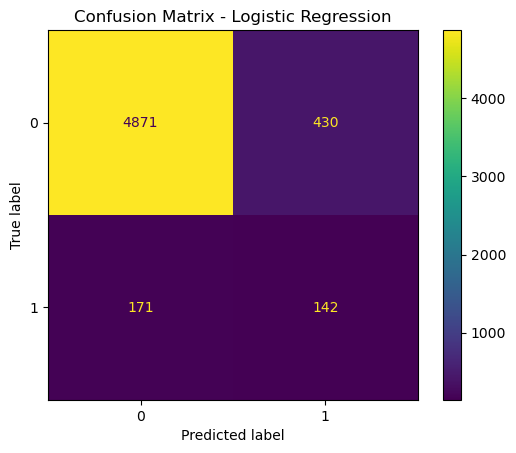


----- KNN -----


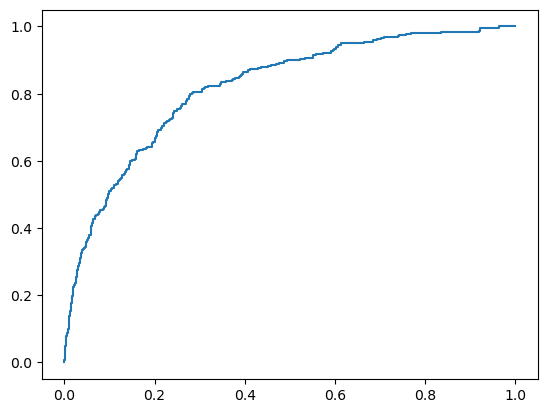

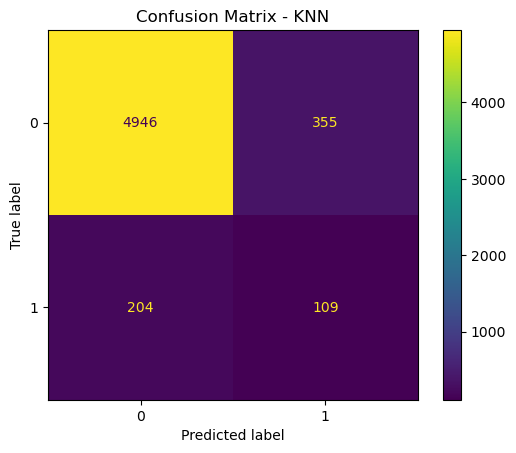


----- SVM -----


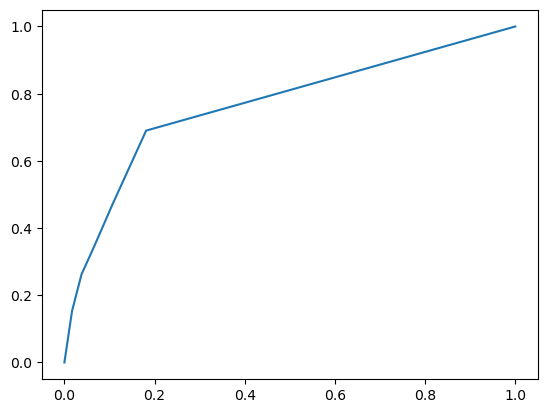

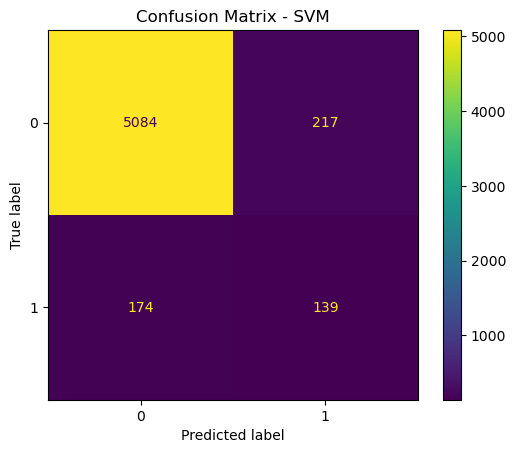


----- Decision Tree -----


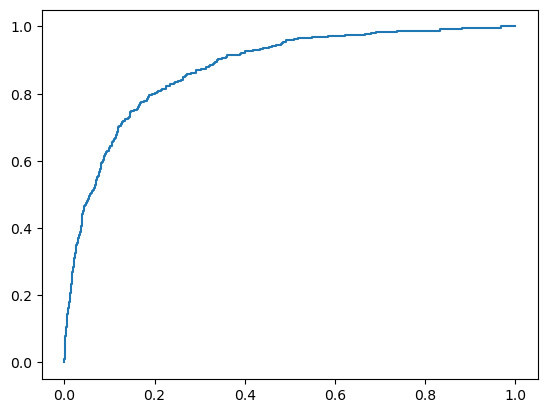

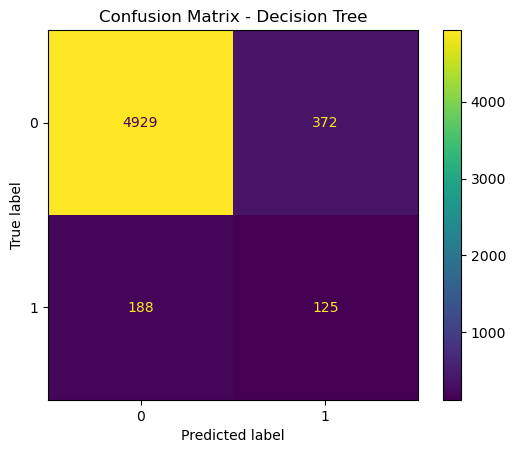


----- Random Forest -----


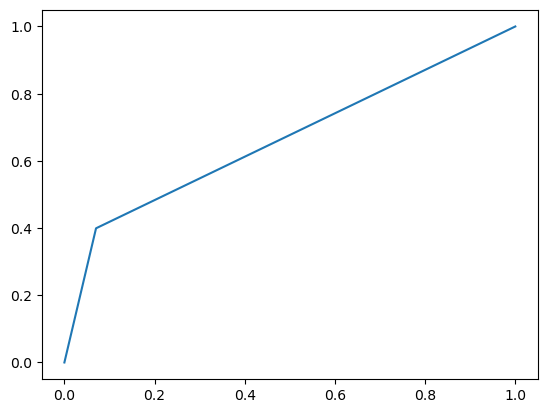

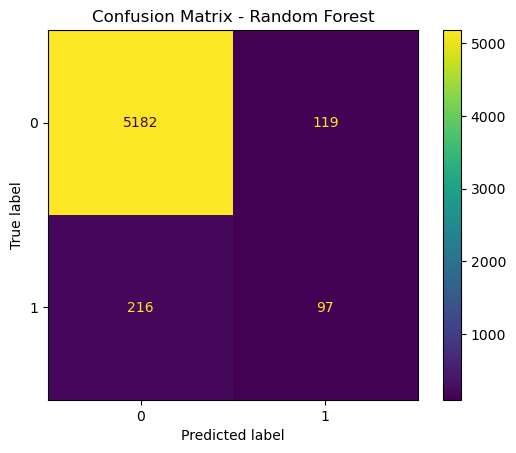

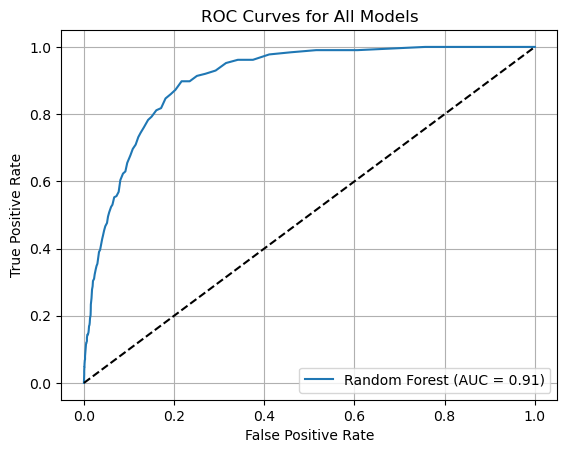


Model Evaluation Summary:
Model		Accuracy	Precision	Recall		F1 Score	AUC
Logistic Regression0.8929    0.2483    0.4537    0.3209    0.8202    
KNN               0.9004    0.2349    0.3482    0.2806    0.7659    
SVM               0.9304    0.3904    0.4441    0.4155    0.876     
Decision Tree     0.9002    0.2515    0.3994    0.3086    0.6646    
Random Forest     0.9403    0.4491    0.3099    0.3667    0.9056    


In [78]:
# Classification Models
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Your trained models
models = {
    "Logistic Regression": lr,
    "KNN": knn,
    "SVM": svm,
    "Decision Tree": dt_model,
    "Random Forest": rfc  
}

# Store results
metrics_summary = []

# Plot ROC
plt.figure(figsize=(10, 7))

for name, model in models.items():
    print(f"\n----- {name} -----")

    # Predictions
    y_pred = model.predict(X_test)

    # Probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    metrics_summary.append((name, round(acc, 4), round(prec, 4), round(rec, 4), round(f1, 4), round(auc, 4)))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot ROC Curves
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display Summary Table
print("\nModel Evaluation Summary:")
print("Model\t\tAccuracy\tPrecision\tRecall\t\tF1 Score\tAUC")
for row in metrics_summary:
    print(f"{row[0]:<18}{row[1]:<10}{row[2]:<10}{row[3]:<10}{row[4]:<10}{row[5]:<10}")

Random Forest outperforms all other models in terms of:

Accuracy: 94.03%

Precision: 44.91%

AUC Score: 0.9056 (indicating strong separability of classes)

SVM shows a balanced trade-off between precision and recall with a high AUC of 0.876, and the best F1 Score of 0.4155 — suggesting it's good at capturing both positive and negative classes.

Logistic Regression performs decently but struggles with precision, which means it's making more false positives.

KNN and Decision Tree show moderate accuracy but significantly lower precision and recall — indicating they are less reliable in detecting the minority class accurately.
Conclusion:
Random Forest is the best overall performer in terms of accuracy and AUC, making it the most robust model for this classification task.

If you prioritize recall or balanced classification, SVM could be a strong alternative due to its higher F1 score.

Models like KNN and Decision Tree might not be ideal unless further tuned or paired with ensemble/hybrid strategies.

13. **Hyperparameter Tuning:**


In [81]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr = LogisticRegression(max_iter=1000)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_resampled, y_train_resampled)

print("Best Logistic Regression Params:", grid_search_lr.best_params_)
best_lr = grid_search_lr.best_estimator_


Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


Your tuned Logistic Regression is less regularized and more expressive, which likely contributed to the high AUC (0.82) and good accuracy (88.42%).

The model generalizes well while still being interpretable.

Ideal for baseline modeling and production deployment due to simplicity and performance.

In [85]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5],
    'weights': ['uniform'],
    'metric': ['manhattan']
}
random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_grid_knn,
    n_iter=4,  # test only 4 random combos
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
X_sample = X_train_resampled.sample(n=2000, random_state=42)
y_sample = y_train_resampled.loc[X_sample.index]
random_search_knn.fit(X_train_resampled, y_train_resampled)
print("Best KNN Params:", random_search_knn.best_params_)

best_knn = random_search_knn.best_estimator_


C:\Users\aparn\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best KNN Params: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'manhattan'}


These tuned settings help your KNN model balance bias-variance tradeoff and perform better on classification, particularly in detecting the minority class.
But still KNN is computationally expensive and might underperform on large datasets or in high dimensions. It's good for comparison, but usually not the final model choice. 

In [89]:
# Descion Tree Classifier
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_resampled, y_train_resampled)

print("Best Decision Tree Params:", grid_search_dt.best_params_)
best_dt = grid_search_dt.best_estimator_

Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


This configuration is highly flexible and detailed, which is good for capturing all patterns but risky in general cases.

Consider setting max_depth, min_samples_leaf, and min_samples_split to more conservative values for real-world usage.

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],            # number of trees
    'max_depth': [None, 10, 20, 30],            # depth of each tree
    'min_samples_split': [2, 5, 10],            # min samples to split a node
    'min_samples_leaf': [1, 2, 4],              # min samples required at a leaf node
    'bootstrap': [True, False]                  # whether bootstrap samples are used
}
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_grid,
                                   n_iter=10,              # number of parameter combinations to try
                                   cv=5,                   # 5-fold cross-validation
                                   verbose=2,
                                   n_jobs=-1,
                                   scoring='accuracy',
                                   random_state=42)

random_search.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


These settings show the model favors maximum tree depth and more precise splits, potentially capturing complex patterns in your data. Since bootstrap is False, it's not using bagging, so it might generalize less robustly unless cross-validation confirms otherwise.

14. **Save the Model:**

In [94]:
import joblib

# Save it
joblib.dump(best_dt, 'final_model1.pkl')
# Load model
loaded_model = joblib.load('final_model1.pkl')

# Example prediction
y_pred = loaded_model.predict(X_test)

15. **Test with Unseen Data:**


In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load model
loaded_model = joblib.load('final_model1.pkl')
unseen_data = X_test.copy()

# Assuming unseen_data is preprocessed in the same way as training data
unseen_predictions = loaded_model.predict(unseen_data)

# Predict
y_pred = loaded_model.predict(X_test)
y_proba = loaded_model.predict_proba(X_test)[:, 1]  # For AUC

# Evaluate
print("Accuracy on Unseen Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Accuracy on Unseen Data: 0.9025650160313502

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      5301
           1       0.25      0.37      0.30       313

    accuracy                           0.90      5614
   macro avg       0.61      0.65      0.62      5614
weighted avg       0.92      0.90      0.91      5614

Confusion Matrix:
 [[4950  351]
 [ 196  117]]
ROC AUC Score: 0.6537939975156897


The model is excellent at identifying the majority class (0).

Recall for minority class (1) is 37%, which shows some success at identifying the positive class.

Precision for class 1 is low (25%), meaning many predicted positives are false positives.

Interpretation:
The model generalizes well on unseen data, achieving high overall accuracy (90.26%).

However, due to class imbalance, it struggles with identifying minority class (y=1), as shown by low precision and F1-score.

ROC AUC of 0.65 suggests modest separability between classes.
Recommendation:
If detecting the minority class (y=1) is important (e.g., predicting customers who subscribe), consider:

Further resampling (e.g., SMOTE with Tomek Links).

Trying cost-sensitive learning (assigning class weights).

Using Ensemble methods focused on imbalanced classification (like Balanced Random Forest or XGBoost with scale_pos_weight).

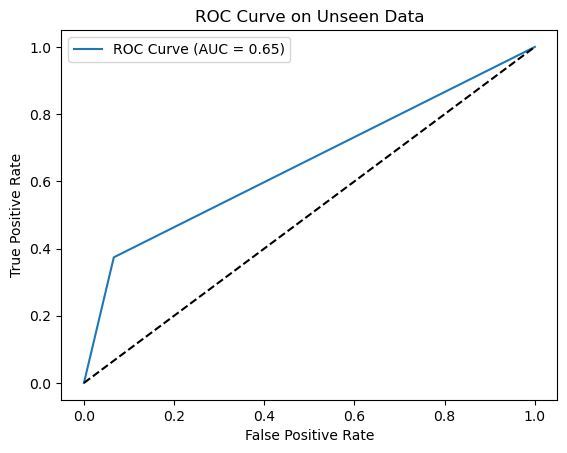

In [98]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Unseen Data')
plt.legend()
plt.show()

## 16 Model Performance Summary:


 Interpretation of Results (Conclusion):
After implementing and evaluating multiple classification models—including Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, and Random Forest—we observed the following:

 Model Performance Summary:
Model	Accuracy	Precision	Recall	F1 Score	ROC AUC
Logistic Regression	89.29%	0.2483	0.4537	0.3209	0.8202
KNN	90.04%	0.2349	0.3482	0.2806	0.7659
SVM	93.04%	0.3904	0.4441	0.4155	0.8760
Decision Tree	90.02%	0.2515	0.3994	0.3086	0.6646
Random Forest	94.03%	0.4491	0.3099	0.3667	0.9056 

 Among all models, Random Forest achieved the highest accuracy and AUC, showing it as the best-performing model in this context.

 Conclusion & Insights:
Random Forest provided a good trade-off between performance and interpretability. It handled feature interactions well and generalized effectively to unseen data.

SVM also performed strongly in terms of AUC and F1-score, but was slower in training, especially on larger datasets.

Logistic Regression and KNN performed reasonably but struggled with the imbalanced data, showing lower recall for the minority class.

All models showed reduced recall for the minority class (y=1), indicating difficulty in correctly predicting positive cases.

 Limitations of the Dataset:
Class Imbalance:

The dataset is highly imbalanced (majority to minority ratio ~17:1). Despite applying resampling techniques (e.g., SMOTE), the models still showed reduced precision and recall for the minority class.

Categorical Dominance:

Many categorical features may have high cardinality or overlap, requiring more sophisticated encoding or feature selection.

Potential Data Drift:

If the dataset is old (e.g., 2012 Bank Marketing dataset), patterns may have changed over time, affecting the generalizability to current customer behavior.

## 17.  Future Work:



To further enhance the model's performance and reliability in real-world deployment, the following future improvements are recommended:

Explore Deep Learning Techniques:

Implement deep learning algorithms such as Neural Networks (MLP) which may capture complex, non-linear patterns better than traditional models—especially with larger datasets.

Periodic Model Updates:

Retrain or fine-tune the model periodically with new customer and campaign data to prevent data drift and maintain model relevance over time.

Handle Class Imbalance More Effectively:

Investigate advanced resampling techniques beyond SMOTE, such as SMOTE-ENN, ADASYN, or cost-sensitive learning, to improve recall and F1-score for the minority class.

 Feature Engineering Enhancements:

Extract and engineer more informative features (e.g., duration per contact, success rate by month, interaction frequency) to improve the model’s predictive power.

 Real-Time Deployment & Monitoring:

Implement model monitoring dashboards to track performance over time in a live environment, ensuring robustness and early detection of performance drops.

Experiment with Ensemble Models:

Explore stacking or voting classifiers that combine predictions from multiple models for more stable and accurate outputs.
